In [43]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import largestinteriorrectangle as lir

In [44]:
lake_path = '../data/raw_data/NVEData/Innsjo/Innsjo_Innsjo.dbf'
raw_lake_gdf = gpd.read_file(lake_path).rename(columns={'vatnLnr':'lake_id'})
raw_lake_gdf

,objType,lake_id,navn,hoyde_moh,areal_km2,magasinNr,magasinKat,magasinFor,vassdragNr,hierarki,vassOmrNr,grensesjo,land1,land2,arealNorge,dybdekart,arealFelt,uttakDato,ekspType,geometry
0,Innsjø,101659,None,NaN,0.01,NaN,NaN,None,119.62B,Remma,119,NaN,NO,None,0.01,None,0.08,2024-01-31,NVEs nedlastningsløsning,"POLYGON Z ((229911.430 7049804.700 0.000, 2299..."
1,Innsjø,143542,None,NaN,0.01,NaN,NaN,None,116.B,Røsta,116,NaN,NO,None,0.01,None,0.05,2024-01-31,NVEs nedlastningsløsning,"POLYGON Z ((192887.790 7031240.180 0.000, 1928..."
2,Innsjø,142928,None,NaN,0.00,NaN,NaN,None,117.2Z,Sloelva,117,NaN,NO,None,0.00,None,0.06,2024-01-31,NVEs nedlastningsløsning,"POLYGON Z ((184699.320 7056815.010 0.000, 1847..."
3,Innsjø,66236,None,1284.0,0.02,NaN,NaN,None,073.C42,Lærdalsvassdraget,073,NaN,NO,None,0.02,None,1.09,2024-01-31,NVEs nedlastningsløsning,"POLYGON Z ((119017.310 6794938.950 0.000, 1190..."
4,Innsjø,149735,None,1381.0,0.00,NaN,NaN,None,073.C41,Lærdalsvassdraget,073,NaN,NO,None,0.00,None,0.86,2024-01-31,NVEs nedlastningsløsning,"POLYGON Z ((113138.340 6795535.160 0.000, 1131..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267188,InnsjøRegulert,1131,Limingen,418.0,93.27,303.0,1.0,Kraftproduksjon,307.3BC10,Linvasselva/Faxälven,307,NaN,NO,None,93.27,J,675.19,2024-01-31,NVEs nedlastningsløsning,MULTIPOLYGON Z (((431383.410 7196604.840 0.000...
267189,InnsjøRegulert,1267,Nisser,247.0,76.47,337.0,1.0,Kraftproduksjon,019.E7,Arendalsvassdraget,019,NaN,NO,None,76.47,J,1078.63,2024-01-31,NVEs nedlastningsløsning,"POLYGON Z ((129836.320 6594396.620 0.000, 1298..."
267190,InnsjøRegulert,1268,Vråvatn,248.0,14.96,338.0,1.0,Kraftproduksjon,019.G10,Arendalsvassdraget,019,NaN,NO,None,14.96,J,471.12,2024-01-31,NVEs nedlastningsløsning,MULTIPOLYGON Z (((112418.280 6600418.500 0.000...
267191,InnsjøRegulert,1399,Lundevatnet,49.0,27.48,371.0,1.0,Kraftproduksjon,026.B1,Sira,026,NaN,NO,None,27.48,J,1898.49,2024-01-31,NVEs nedlastningsløsning,"MULTIPOLYGON Z (((7974.560 6509982.200 0.000, ..."


In [45]:
grid_path = '../data/raw_data/NVEData/Kraftnett/Kraftnett_Transformatorstasjon.dbf'
grid_gdf = gpd.read_file(grid_path)

grid_gdf

,objType,kompKode,kompKodSys,nveNettniv,nettnivaa,eier,eierOrgnr,navn,spenningkV,driftsatt,nveOpprett,nveEndret,kildEndret,malemetode,noyaktighe,lokalID,uttakDato,ekspType,geometry
0,EL_Transformatorstasjon,NaN,None,3,Distribusjonsnett,LOFOTKRAFT AS,986347801.0,CD RØST,0.0,1963.0,None,None,None,NaN,NaN,{7C28425A-B606-4046-A4BF-3D11502BFBF7},2024-01-31,NVEs nedlastningsløsning,POINT Z (377254.300 7492022.164 0.000)
1,EL_Transformatorstasjon,NaN,None,3,Distribusjonsnett,LOFOTKRAFT AS,986347801.0,CL FINNBYEN,0.0,1987.0,None,None,None,NaN,NaN,{6572BC2B-2F33-420C-99D0-FCDC01A712F3},2024-01-31,NVEs nedlastningsløsning,POINT Z (425162.670 7552179.224 0.000)
2,EL_Transformatorstasjon,NaN,None,3,Distribusjonsnett,LOFOTKRAFT AS,986347801.0,CM MARKJORD,0.0,1985.0,None,None,None,NaN,NaN,{2BE4327E-D854-4F29-969B-7C848E2370B3},2024-01-31,NVEs nedlastningsløsning,POINT Z (421713.352 7549691.156 0.000)
3,EL_Transformatorstasjon,NaN,None,3,Distribusjonsnett,LOFOTKRAFT AS,986347801.0,CB FORSFJORD,0.0,1937.0,None,None,None,NaN,NaN,{C323F3FB-C1B4-4498-BFCE-AC6BE4ED178A},2024-01-31,NVEs nedlastningsløsning,POINT Z (415421.906 7537499.647 0.000)
4,EL_Transformatorstasjon,NaN,None,2,Regionalnett,LOFOTKRAFT AS,986347801.0,CA SOLBJØRN,0.0,2011.0,None,None,None,NaN,NaN,{8BE5E9E5-095B-427A-B15B-D9E0D75BE04F},2024-01-31,NVEs nedlastningsløsning,POINT Z (423129.055 7544516.696 0.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,EL_Transformatorstasjon,77536.0,NVE NetBAS,2,Regionalnett,LOFOTKRAFT AS,986347801.0,BP FYGLE,NaN,2013.0,2021-07-09,2019-07-30,None,NaN,NaN,{BC7060B6-5CE5-4411-A917-A05F016D576C},2024-01-31,NVEs nedlastningsløsning,POINT Z (443423.067 7560117.291 0.000)
2055,EL_Transformatorstasjon,77487.0,NVE NetBAS,2,Regionalnett,GLITRE ENERGI NETT AS,981915550.0,MÆRINGEN-T,NaN,1963.0,2021-07-09,2019-07-30,None,NaN,NaN,{FFCE6237-4C47-4B3B-BC99-D42D5BA388A5},2024-01-31,NVEs nedlastningsløsning,POINT Z (40324.294 6756123.710 0.000)
2056,EL_Transformatorstasjon,77438.0,NVE NetBAS,2,Regionalnett,VEST-TELEMARK KRAFTLAG AS,925803375.0,T_OSEN,NaN,1952.0,2021-07-09,2019-07-30,None,NaN,NaN,{B9AF0901-4F8C-44C8-B4FC-7357AD87410A},2024-01-31,NVEs nedlastningsløsning,POINT Z (112456.523 6599653.837 0.000)
2057,EL_Transformatorstasjon,74967.0,NVE NetBAS,2,Regionalnett,TENSIO TS AS,978631029.0,T_GRØA,NaN,1999.0,2021-07-09,2019-07-30,None,NaN,NaN,{4AA920BC-953C-490B-BCB9-E7FE485447C6},2024-01-31,NVEs nedlastningsløsning,POINT Z (179031.217 6961444.309 0.000)


In [46]:
constrict_gdf = gpd.read_file('../data/raw_data/milodirektoratet/Vern_0000_norge_25833_GML.gml', 
                              driver='GML',
                              layer="naturvernområde")


In [47]:
flood_gdf = gpd.read_file('../data/raw_data/Samfunnssikkerhet_0000_Norge_25833_Flomsoner_GML.gml', 
                              driver='GML')
flood_gdf = gpd.GeoDataFrame(geometry=flood_gdf['geometry'])

In [6]:
raw_lake_gdf[raw_lake_gdf.duplicated(subset=['lake_id'], keep=False)]


,objType,lake_id,navn,hoyde_moh,areal_km2,magasinNr,magasinKat,magasinFor,vassdragNr,hierarki,vassOmrNr,grensesjo,land1,land2,arealNorge,dybdekart,arealFelt,uttakDato,ekspType,geometry
266584,Innsjø,2109,Langvatnet,849.0,2.38,NaN,NaN,None,109.5F,Litledalselva,109,NaN,NO,None,2.38,None,55.33,2024-01-31,NVEs nedlastningsløsning,"POLYGON Z ((168587.946 6938359.543 0.000, 1686..."
266585,Innsjø,2109,Langvatnet,849.0,2.38,NaN,NaN,None,109.5F,Litledalselva,109,NaN,NO,None,2.38,None,55.33,2024-01-31,NVEs nedlastningsløsning,"POLYGON Z ((168610.583 6938366.014 0.000, 1685..."


# Filtering Lake data

In [48]:
# Selecting columns needed 
raw_lake_gdf = raw_lake_gdf[['lake_id', 'geometry']]

grid_gdf = grid_gdf[['lokalID', 'geometry']]
grid_gdf['grid_geometry'] = grid_gdf['geometry']

/home/mette/master/fpv_energy_yield_norway/.venv/lib/python3.10/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [49]:
# Filter by area
area_min = 0
lake_gdf= raw_lake_gdf[raw_lake_gdf.area>=area_min]
lake_gdf['lake_area'] = lake_gdf.area
lake_gdf['lake_geometry'] = lake_gdf['geometry']
lake_gdf

,lake_id,geometry,lake_area,lake_geometry
0,101659,"POLYGON Z ((229911.430 7049804.700 0.000, 2299...",5.859843e+03,"POLYGON Z ((229911.430 7049804.700 0.000, 2299..."
1,143542,"POLYGON Z ((192887.790 7031240.180 0.000, 1928...",5.810132e+03,"POLYGON Z ((192887.790 7031240.180 0.000, 1928..."
2,142928,"POLYGON Z ((184699.320 7056815.010 0.000, 1847...",3.374364e+03,"POLYGON Z ((184699.320 7056815.010 0.000, 1847..."
3,66236,"POLYGON Z ((119017.310 6794938.950 0.000, 1190...",1.916710e+04,"POLYGON Z ((119017.310 6794938.950 0.000, 1190..."
4,149735,"POLYGON Z ((113138.340 6795535.160 0.000, 1131...",2.548759e+03,"POLYGON Z ((113138.340 6795535.160 0.000, 1131..."
...,...,...,...,...
267188,1131,MULTIPOLYGON Z (((431383.410 7196604.840 0.000...,9.327115e+07,MULTIPOLYGON Z (((431383.410 7196604.840 0.000...
267189,1267,"POLYGON Z ((129836.320 6594396.620 0.000, 1298...",7.646861e+07,"POLYGON Z ((129836.320 6594396.620 0.000, 1298..."
267190,1268,MULTIPOLYGON Z (((112418.280 6600418.500 0.000...,1.495895e+07,MULTIPOLYGON Z (((112418.280 6600418.500 0.000...
267191,1399,"MULTIPOLYGON Z (((7974.560 6509982.200 0.000, ...",2.748261e+07,"MULTIPOLYGON Z (((7974.560 6509982.200 0.000, ..."


In [50]:
gross_gdf = lake_gdf[['geometry', 'lake_id', 'lake_area']].copy()
gross_gdf['geometry'] = gross_gdf['geometry'].set_crs('EPSG:25833')
gross_gdf['selected_area']=gross_gdf['lake_area']
gross_gdf['latitude']=gross_gdf['geometry'].centroid.to_crs('EPSG:4326').y
gross_gdf['longitude']=gross_gdf['geometry'].centroid.to_crs('EPSG:4326').x
gross_gdf = gross_gdf.drop(columns='geometry')
gross_gdf.to_csv('../data/new_data/gross_area_systems.csv', index=False)

In [10]:
gross_area = lake_gdf.geometry.area.sum()

print(f'Gross area: {gross_area}')

Gross area: 18594220602.5719


In [51]:
# Remove conservated areas
constrict_gdf = gpd.GeoDataFrame(geometry=constrict_gdf['geometry'])

lake_gdf.sindex
constrict_gdf.sindex
# Perform spatial difference operation
unconstricted_lakes = gpd.overlay(lake_gdf, constrict_gdf, how='difference')
social_potential_gdf = gpd.overlay(unconstricted_lakes, flood_gdf, how='difference')
social_potential_gdf['not_conserved_geometry'] = social_potential_gdf.area

# Selecting maximum 10% of lake area
social_potential_gdf['social_area'] = social_potential_gdf.apply(lambda row: min(row['not_conserved_geometry'], row['lake_area']*0.1), axis=1)

# Sum the social acceptable areas
total_social_area = social_potential_gdf['social_area'].sum()
print(f'Social accepted area: {total_social_area}')

/tmp/ipykernel_295/3728841438.py:7: UserWarning: `keep_geom_type=True` in overlay resulted in 513 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  unconstricted_lakes = gpd.overlay(lake_gdf, constrict_gdf, how='difference')


Social accepted area: 1618030073.962412


In [12]:
social_potential_gdf

,lake_id,geometry,lake_area,lake_geometry,not_conserved_geometry,social_area
0,101659,"POLYGON Z ((229911.430 7049804.700 0.000, 2299...",5.859843e+03,"POLYGON Z ((229911.430 7049804.700 0.000, 2299...",5.859843e+03,5.859843e+02
1,143542,"POLYGON Z ((192887.790 7031240.180 0.000, 1928...",5.810132e+03,"POLYGON Z ((192887.790 7031240.180 0.000, 1928...",5.810132e+03,5.810132e+02
2,66236,"POLYGON Z ((119017.310 6794938.950 0.000, 1190...",1.916710e+04,"POLYGON Z ((119017.310 6794938.950 0.000, 1190...",1.916710e+04,1.916710e+03
3,149735,"POLYGON Z ((113138.340 6795535.160 0.000, 1131...",2.548759e+03,"POLYGON Z ((113138.340 6795535.160 0.000, 1131...",2.548759e+03,2.548759e+02
4,43611,"POLYGON Z ((402955.040 7216189.110 0.000, 4029...",1.795534e+04,"POLYGON Z ((402955.040 7216189.110 0.000, 4029...",1.795534e+04,1.795534e+03
...,...,...,...,...,...,...
211091,1131,MULTIPOLYGON Z (((431389.750 7196599.330 0.000...,9.327115e+07,MULTIPOLYGON Z (((431383.410 7196604.840 0.000...,9.323478e+07,9.327115e+06
211092,1267,"POLYGON Z ((129836.320 6594396.620 0.000, 1298...",7.646861e+07,"POLYGON Z ((129836.320 6594396.620 0.000, 1298...",7.646861e+07,7.646861e+06
211093,1268,MULTIPOLYGON Z (((112418.280 6600418.500 0.000...,1.495895e+07,MULTIPOLYGON Z (((112418.280 6600418.500 0.000...,1.495895e+07,1.495895e+06
211094,1399,"MULTIPOLYGON Z (((7974.560 6509982.200 0.000, ...",2.748261e+07,"MULTIPOLYGON Z (((7974.560 6509982.200 0.000, ...",2.748261e+07,2.748261e+06


In [52]:
social_potential_gdf['geometry'] = social_potential_gdf['geometry'].set_crs('EPSG:25833')
social_potential_gdf['selected_area']=social_potential_gdf['social_area']
social_potential_gdf['latitude']=social_potential_gdf['geometry'].centroid.to_crs('EPSG:4326').y
social_potential_gdf['longitude']=social_potential_gdf['geometry'].centroid.to_crs('EPSG:4326').x
social_potential_gdf[['lake_id', 'lake_area', 'selected_area', 'latitude', 'longitude']].to_csv('../data/new_data/social_area_systems.csv', index=False)

In [23]:
social_potential_gdf

,lake_id,geometry,lake_area,lake_geometry,not_conserved_geometry,social_area,selected_area,latitude,longitude,socially_geometry
0,101659,"POLYGON Z ((229911.430 7049804.700 0.000, 2299...",5.859843e+03,"POLYGON Z ((229911.430 7049804.700 0.000, 2299...",5.859843e+03,5.859843e+02,5.859843e+02,63.473298,9.573710,"POLYGON Z ((229911.430 7049804.700 0.000, 2299..."
1,143542,"POLYGON Z ((192887.790 7031240.180 0.000, 1928...",5.810132e+03,"POLYGON Z ((192887.790 7031240.180 0.000, 1928...",5.810132e+03,5.810132e+02,5.810132e+02,63.277645,8.870434,"POLYGON Z ((192887.790 7031240.180 0.000, 1928..."
2,66236,"POLYGON Z ((119017.310 6794938.950 0.000, 1190...",1.916710e+04,"POLYGON Z ((119017.310 6794938.950 0.000, 1190...",1.916710e+04,1.916710e+03,1.916710e+03,61.102190,7.924878,"POLYGON Z ((119017.310 6794938.950 0.000, 1190..."
3,149735,"POLYGON Z ((113138.340 6795535.160 0.000, 1131...",2.548759e+03,"POLYGON Z ((113138.340 6795535.160 0.000, 1131...",2.548759e+03,2.548759e+02,2.548759e+02,61.102717,7.814424,"POLYGON Z ((113138.340 6795535.160 0.000, 1131..."
4,43611,"POLYGON Z ((402955.040 7216189.110 0.000, 4029...",1.795534e+04,"POLYGON Z ((402955.040 7216189.110 0.000, 4029...",1.795534e+04,1.795534e+03,1.795534e+03,65.053249,12.938207,"POLYGON Z ((402955.040 7216189.110 0.000, 4029..."
...,...,...,...,...,...,...,...,...,...,...
211091,1131,MULTIPOLYGON Z (((431389.750 7196599.330 0.000...,9.327115e+07,MULTIPOLYGON Z (((431383.410 7196604.840 0.000...,9.323478e+07,9.327115e+06,9.327115e+06,64.792989,13.583213,MULTIPOLYGON Z (((431389.750 7196599.330 0.000...
211092,1267,"POLYGON Z ((129836.320 6594396.620 0.000, 1298...",7.646861e+07,"POLYGON Z ((129836.320 6594396.620 0.000, 1298...",7.646861e+07,7.646861e+06,7.646861e+06,59.169496,8.492432,"POLYGON Z ((129836.320 6594396.620 0.000, 1298..."
211093,1268,MULTIPOLYGON Z (((112418.280 6600418.500 0.000...,1.495895e+07,MULTIPOLYGON Z (((112418.280 6600418.500 0.000...,1.495895e+07,1.495895e+06,1.495895e+06,59.338664,8.314086,MULTIPOLYGON Z (((112418.280 6600418.500 0.000...
211094,1399,"MULTIPOLYGON Z (((7974.560 6509982.200 0.000, ...",2.748261e+07,"MULTIPOLYGON Z (((7974.560 6509982.200 0.000, ...",2.748261e+07,2.748261e+06,2.748261e+06,58.386973,6.585204,"MULTIPOLYGON Z (((7974.560 6509982.200 0.000, ..."


In [53]:
social_potential_gdf['geometry'].to_file('../data/new_data/social_accepted.dbf', index=False)

In [54]:
buffered_grid_gdf = grid_gdf.copy()
buffered_grid_gdf = buffered_grid_gdf.set_geometry(buffered_grid_gdf.buffer(2000))
buffered_grid_gdf['buffered_grid_geometry']= buffered_grid_gdf.geometry

social_potential_gdf['socially_geometry'] = social_potential_gdf['geometry']

social_2km = social_potential_gdf.sjoin(buffered_grid_gdf, how='inner')[['lake_id', 'lake_area', 'socially_geometry', 'selected_area', 'latitude', 'longitude']]


In [55]:
social_2km.drop_duplicates(inplace=True)
social_2km['selected_area'].sum()

267255416.89553684

In [56]:
social_2km

,lake_id,lake_area,socially_geometry,selected_area,latitude,longitude
26,132159,1.229337e+04,"POLYGON Z ((234572.250 6603755.010 0.000, 2346...",1.229337e+03,59.486948,10.311649
38,195760,3.036810e+03,"POLYGON Z ((5585.910 6576684.200 0.000, 5592.3...",3.036810e+02,59.041067,6.368114
47,56687,2.132798e+04,"POLYGON Z ((891290.400 7780649.220 0.000, 8912...",2.132798e+03,69.838383,25.211275
63,25616,1.013854e+04,"POLYGON Z ((7378.420 6576690.630 0.000, 7381.6...",1.013854e+03,59.042819,6.399275
102,131814,1.058677e+04,"POLYGON Z ((126926.950 6490055.650 0.000, 1269...",1.058677e+03,58.391020,8.611860
...,...,...,...,...,...,...
211090,930,1.221736e+08,MULTIPOLYGON Z (((370004.780 7129380.370 0.000...,1.221736e+07,64.188242,12.020824
211091,1131,9.327115e+07,MULTIPOLYGON Z (((431389.750 7196599.330 0.000...,9.327115e+06,64.792989,13.583213
211092,1267,7.646861e+07,"POLYGON Z ((129836.320 6594396.620 0.000, 1298...",7.646861e+06,59.169496,8.492432
211093,1268,1.495895e+07,MULTIPOLYGON Z (((112418.280 6600418.500 0.000...,1.495895e+06,59.338664,8.314086


In [57]:
social_2km[['lake_id', 'lake_area', 'selected_area', 'latitude', 'longitude']].to_csv('../data/new_data/social_area_2km_systems.csv', index=False)

In [58]:
social_2km['socially_geometry'].to_file('../data/new_data/social_accepted_2km.dbf', index=False)

In [17]:
del social_potential_gdf

# Checking for duplicates

In [18]:
print(f"Duplicates: {lake_gdf.duplicated('lake_id').sum()}")

Duplicates: 1


In [19]:
raw_lake_gdf.isna().sum()

lake_id     0
geometry    0
dtype: int64

In [20]:
lake_gdf[lake_gdf.index.duplicated()]

,lake_id,geometry,lake_area,lake_geometry


In [21]:
grid_distance = 2000
coastiline_outer_padding = 300
coastline_inner_padding = 20


# Create a new GeoDataFrame for the buffered grid
buffered_grid_gdf = grid_gdf.copy()
buffered_grid_gdf = buffered_grid_gdf.set_geometry(buffered_grid_gdf.buffer(grid_distance))
buffered_grid_gdf['buffered_grid_geometry']= buffered_grid_gdf.geometry

# Create One to many dataset 
joined_gdf = lake_gdf.sjoin(buffered_grid_gdf)

joined_gdf['lake_geometry'].to_file('../data/new_data/sjoined.dbf')
joined_gdf.reset_index(drop=True, inplace=True)

# Find coastline within grid_distance
joined_gdf['coastline'] = joined_gdf['lake_geometry'].exterior.intersection(joined_gdf['buffered_grid_geometry'])

# Buffer coastline with water_distance to get outer limit
joined_gdf['coastline_outer_padding'] = joined_gdf['coastline'].buffer(coastiline_outer_padding)

# Buffer coastline with coastline_pad to get inner limit
joined_gdf['coastline_inner_padding'] = joined_gdf['lake_geometry'].exterior.buffer(coastline_inner_padding)

# Create mask for area between outer and inner limit
joined_gdf['lake_mask'] = joined_gdf['coastline_outer_padding'].difference(joined_gdf['coastline_inner_padding'])

# Select lake area from mask
joined_gdf['selected_area_including_conservated'] = joined_gdf['lake_geometry'].intersection(joined_gdf['lake_mask'])

# Resetting index


In [22]:
buffered_grid_gdf['buffered_grid_geometry'].to_file('../data/new_data/buffered_grid_geometry.dbf')
joined_gdf['coastline'].to_file('../data/new_data/coastline.dbf')
joined_gdf['coastline_outer_padding'].to_file('../data/new_data/coastline_outer_padding.dbf')
joined_gdf['coastline_inner_padding'].to_file('../data/new_data/coastline_inner_padding.dbf')
joined_gdf['lake_mask'].to_file('../data/new_data/lake_mask.dbf')
joined_gdf['selected_area_including_conservated'].to_file('../data/new_data/selected_area_including_conservated.dbf')

joined_gdf = joined_gdf[['lake_id', 'lake_area', 'selected_area_including_conservated', 'grid_geometry', 'lokalID']] 

In [23]:
joined_gdf = joined_gdf.set_geometry('selected_area_including_conservated')

In [24]:
# Remove conservated and flood hazard areas
not_conserved_gdf = gpd.overlay(joined_gdf, constrict_gdf, how='difference')
selected_gdf = gpd.overlay(not_conserved_gdf, flood_gdf, how='difference')

selected_gdf = selected_gdf.rename(columns={'selected_area_including_conservated': 'selected_area'})
selected_gdf = selected_gdf.set_geometry('selected_area')

/tmp/ipykernel_26939/2411731461.py:2: UserWarning: `keep_geom_type=True` in overlay resulted in 88 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  not_conserved_gdf = gpd.overlay(joined_gdf, constrict_gdf, how='difference')


In [25]:
del joined_gdf
del not_conserved_gdf

In [26]:
# joined_gdf['not_conservated'] = joined_gdf['selected_area_including_conservated'].difference(constrict_gdf['geometry'].unary_union)
# joined_gdf['selected_area'] = joined_gdf['not_conservated'].difference(flood_gdf.unary_union)
# Remove empty geometries
# joined_gdf = joined_gdf[~joined_gdf['selected_area'].is_empty]


In [27]:
selected_gdf

,lake_id,lake_area,selected_area,grid_geometry,lokalID
0,132159,1.229337e+04,"POLYGON Z ((234592.443 6603679.094 0.000, 2345...",POINT Z (234496.740 6601909.797 0.000),{05774480-4F4D-4B57-8E0B-F772AC0053CB}
1,132159,1.229337e+04,"POLYGON Z ((234592.443 6603679.094 0.000, 2345...",POINT Z (235483.441 6602685.134 0.000),{F0D0C69A-862A-4E2F-8456-B0F1CD0CED5A}
2,132159,1.229337e+04,"POLYGON Z ((234592.443 6603679.094 0.000, 2345...",POINT Z (233808.961 6603649.577 0.000),{EC35431E-F8EA-49CD-AEC3-B832D58BF563}
3,56687,2.132798e+04,"POLYGON Z ((891260.092 7780702.727 0.000, 8912...",POINT Z (889948.938 7779508.250 0.000),{0371B115-10E4-416E-8D16-376F32155F33}
4,56687,2.132798e+04,"POLYGON Z ((891260.092 7780702.727 0.000, 8912...",POINT Z (889973.842 7779511.161 0.000),{5E555CFA-40AE-4123-A052-BBFBF40BFDF1}
...,...,...,...,...,...
3876,565,3.575425e+06,"POLYGON Z ((192825.821 6769576.372 0.000, 1928...",POINT Z (191601.544 6771430.863 0.000),{6AA8086A-F413-463C-B4AB-940FED318258}
3877,565,3.575425e+06,MULTIPOLYGON Z (((196442.330 6766023.740 0.000...,POINT Z (195470.545 6766590.816 0.000),{15B49227-FBCA-4C76-93BD-6BEAE6D0C826}
3878,565,3.575425e+06,MULTIPOLYGON Z (((196442.330 6766023.740 0.000...,POINT Z (195485.298 6766595.514 0.000),{19D42896-0277-425B-BD81-4822FA28041A}
3879,565,3.575425e+06,MULTIPOLYGON Z (((196442.330 6766023.740 0.000...,POINT Z (195485.298 6766595.514 0.000),{C543F39A-06AB-4AC4-BCE6-2414885D4C54}


In [28]:
selected_gdf.area.sum()

510963238.0075606

In [29]:
selected_gdf['selected_area'].to_file('../data/new_data/all_practical_possible_locations.dbf')

In [30]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

from shapely.geometry import box
import numpy as np



In [31]:
from shapely import MultiPolygon
def get_biggest_part(geometry):
    if isinstance(geometry, MultiPolygon):
        # Get the area of all mutipolygon parts
        areas = [part.area for part in geometry.geoms]

        # Find the index of the largest part
        max_area_index = areas.index(max(areas))
        
        # Return the largest part
        return list(geometry.geoms)[max_area_index]
    else:
        return geometry

selected_gdf['geometry'] = selected_gdf['selected_area'].apply(get_biggest_part)
selected_gdf.drop(columns='selected_area', inplace=True)

# selected_gdf = selected_gdf.explode(columns='selected_area', ignore_index=True)

In [32]:
selected_gdf['geometry'].to_file('../data/new_data/biggest_part.dbf')

In [33]:
# Remove overlaying polygons

polygons_to_be_removed = []
for index, row in selected_gdf.sample(frac=1, random_state=42).iterrows():
    polygon = row['geometry']
    for other_index, other_row in selected_gdf.iterrows():
        if index == other_index or other_index in polygons_to_be_removed or index in polygons_to_be_removed:
            continue
        other_polygon = other_row['geometry'] 
        if polygon.intersection(other_polygon):
            if polygon.area > other_polygon.area:
                polygons_to_be_removed.append(other_index)
            else:
                polygons_to_be_removed.append(index)

selected_gdf.drop(polygons_to_be_removed, inplace=True)

In [34]:
selected_gdf['geometry'].to_file('../data/new_data/largest_polygon.dbf')

In [35]:
selected_gdf

,lake_id,lake_area,grid_geometry,lokalID,geometry
1,132159,1.229337e+04,POINT Z (235483.441 6602685.134 0.000),{F0D0C69A-862A-4E2F-8456-B0F1CD0CED5A},"POLYGON Z ((234592.443 6603679.094 0.000, 2345..."
4,56687,2.132798e+04,POINT Z (889973.842 7779511.161 0.000),{5E555CFA-40AE-4123-A052-BBFBF40BFDF1},"POLYGON Z ((891260.092 7780702.727 0.000, 8912..."
6,131814,1.058677e+04,POINT Z (127417.531 6491453.288 0.000),{20FB138B-E00D-4A8B-B4C5-57CEC25FF79B},"POLYGON Z ((126901.415 6489998.584 0.000, 1269..."
8,26849,4.957425e+03,POINT Z (-37963.694 6722881.515 0.000),{42D7195C-AAA8-46F0-9F02-10C0F988F978},"POLYGON Z ((-38850.945 6724562.206 0.000, -388..."
9,10282,4.279158e+04,POINT Z (56891.093 6515610.692 0.000),{1688F834-6821-4602-AA83-1F165F26B26A},"POLYGON Z ((55411.690 6516325.088 0.000, 55413..."
...,...,...,...,...,...
3872,429,2.113714e+07,POINT Z (214603.044 6556969.717 0.000),{614233CC-65C7-4955-A80E-357A084B03E3},"POLYGON Z ((213406.690 6558724.220 0.000, 2134..."
3874,429,2.113714e+07,POINT Z (214467.434 6563718.996 0.000),{0687851F-B402-4219-92FC-952631598184},"POLYGON Z ((213148.480 6562917.350 0.000, 2131..."
3875,565,3.575425e+06,POINT Z (191601.708 6771430.583 0.000),{A7426558-B59B-4C3A-A626-7BF137C0464D},"POLYGON Z ((192826.443 6769576.308 0.000, 1928..."
3879,565,3.575425e+06,POINT Z (195485.298 6766595.514 0.000),{C543F39A-06AB-4AC4-BCE6-2414885D4C54},"POLYGON Z ((196442.330 6766023.740 0.000, 1964..."


In [36]:
n_lakes_within_2km = len(selected_gdf['lake_id'].unique())
n_lakes = len(raw_lake_gdf['lake_id'].unique())
print(f'number of lakes within 2km from substation: {n_lakes_within_2km}')
print(f'percentage of lakes within 2km from substation: {n_lakes_within_2km/n_lakes*100} %')

number of lakes within 2km from substation: 2388
percentage of lakes within 2km from substation: 0.8937393335129794 %


In [ ]:

# Rectangle
from shapely.geometry import Polygon

def find_largest_rectangle(row):
    #row = row.geometry
    x, y = row.exterior.xy
    coords = np.dstack((x, y)).tolist()
    polygon = np.array(coords, np.int32)
    x, y, length, width = lir.lir(polygon)
    
    return [x, y, length, width]

def polygon_from_xylw_list(xylw_list):
    x, y, length, width = xylw_list
    return Polygon([(x, y), (x + length, y), (x + length, y + width), (x, y + width)])
    


selected_gdf['system_xylw'] = selected_gdf['geometry'].apply(find_largest_rectangle)
selected_gdf['system_geometry'] = selected_gdf['system_xylw'].apply(polygon_from_xylw_list)

In [38]:
selected_gdf = selected_gdf.set_geometry('system_geometry')
selected_gdf['system_geometry'].to_file('../data/new_data/all_systems.dbf')
selected_gdf['system_geometry'].centroid.to_file('../data/new_data/all_systems_center.dbf')

In [40]:
selected_gdf

,lake_id,lake_area,grid_geometry,lokalID,geometry,system_xylw,system_geometry
1,132159,1.229337e+04,POINT Z (235483.441 6602685.134 0.000),{F0D0C69A-862A-4E2F-8456-B0F1CD0CED5A},"POLYGON Z ((234592.443 6603679.094 0.000, 2345...","[234592, 6603665, 12, 39]","POLYGON ((234592.000 6603665.000, 234604.000 6..."
4,56687,2.132798e+04,POINT Z (889973.842 7779511.161 0.000),{5E555CFA-40AE-4123-A052-BBFBF40BFDF1},"POLYGON Z ((891260.092 7780702.727 0.000, 8912...","[891208, 7780625, 44, 44]","POLYGON ((891208.000 7780625.000, 891252.000 7..."
6,131814,1.058677e+04,POINT Z (127417.531 6491453.288 0.000),{20FB138B-E00D-4A8B-B4C5-57CEC25FF79B},"POLYGON Z ((126901.415 6489998.584 0.000, 1269...","[126905, 6489998, 29, 27]","POLYGON ((126905.000 6489998.000, 126934.000 6..."
8,26849,4.957425e+03,POINT Z (-37963.694 6722881.515 0.000),{42D7195C-AAA8-46F0-9F02-10C0F988F978},"POLYGON Z ((-38850.945 6724562.206 0.000, -388...","[-38858, 6724542, 3, 4]","POLYGON ((-38858.000 6724542.000, -38855.000 6..."
9,10282,4.279158e+04,POINT Z (56891.093 6515610.692 0.000),{1688F834-6821-4602-AA83-1F165F26B26A},"POLYGON Z ((55411.690 6516325.088 0.000, 55413...","[55409, 6516307, 8, 15]","POLYGON ((55409.000 6516307.000, 55417.000 651..."
...,...,...,...,...,...,...,...
3872,429,2.113714e+07,POINT Z (214603.044 6556969.717 0.000),{614233CC-65C7-4955-A80E-357A084B03E3},"POLYGON Z ((213406.690 6558724.220 0.000, 2134...","[214072, 6557151, 187, 1696]","POLYGON ((214072.000 6557151.000, 214259.000 6..."
3874,429,2.113714e+07,POINT Z (214467.434 6563718.996 0.000),{0687851F-B402-4219-92FC-952631598184},"POLYGON Z ((213148.480 6562917.350 0.000, 2131...","[212865, 6563293, 225, 965]","POLYGON ((212865.000 6563293.000, 213090.000 6..."
3875,565,3.575425e+06,POINT Z (191601.708 6771430.583 0.000),{A7426558-B59B-4C3A-A626-7BF137C0464D},"POLYGON Z ((192826.443 6769576.308 0.000, 1928...","[192572, 6769430, 157, 126]","POLYGON ((192572.000 6769430.000, 192729.000 6..."
3879,565,3.575425e+06,POINT Z (195485.298 6766595.514 0.000),{C543F39A-06AB-4AC4-BCE6-2414885D4C54},"POLYGON Z ((196442.330 6766023.740 0.000, 1964...","[194518, 6768257, 824, 228]","POLYGON ((194518.000 6768257.000, 195342.000 6..."


In [41]:
# Contraining every substaiton to only supply o
selected_gdf['system_area'] = selected_gdf['system_xylw'].apply(lambda x: x[2]*x[3])
grouped_grid = selected_gdf.groupby('lokalID')
largest_system_per_grid_idx =  grouped_grid['system_area'].idxmax()

selected_gdf = selected_gdf.loc[largest_system_per_grid_idx]

In [42]:
lakes_grouped = selected_gdf.copy().groupby('lake_id')

def reduce_xylw_by_area(row, excess_area):
    x, y, length, width = row['system_xylw']
    if length>width:
        length -= excess_area/width
    else:
        width -= excess_area/width
    return [x, y, round(length), round(width)]


for lake_id, group in lakes_grouped:
    # Sort systems within the lake group by area in ascending order
    group = group.sort_values(by='system_area')
    total_system_area = group['system_area'].sum()
    lake_area = group.iloc[0]['lake_area'] 
    
    excess_area = float(total_system_area - 0.1 * lake_area)

    for index, row in group.iterrows():
        if excess_area< 0.0:
            break
        elif row['system_area'] <= excess_area:
            selected_gdf = selected_gdf.drop(index)
            excess_area -= float(row['system_area'])
        else:
            selected_gdf.loc[index, 'system_area'] -= float(excess_area)        
            xylw_values = reduce_xylw_by_area(row=row, excess_area=excess_area)
            selected_gdf.at[index, 'system_xylw'] = xylw_values
            break


/tmp/ipykernel_26939/4124150318.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32350.4160899719' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  selected_gdf.loc[index, 'system_area'] -= float(excess_area)


In [43]:

selected_gdf['system_geometry_reduced'] = gpd.GeoDataFrame(geometry=selected_gdf['system_xylw'].apply(polygon_from_xylw_list))
selected_gdf['selected_area']=selected_gdf['system_geometry_reduced'].area

In [44]:
#selected_gdf = selected_gdf[selected_gdf['system_geometry_reduced'].area>10]

systems = selected_gdf[['system_geometry_reduced', 'selected_area', 'lake_id', 'lake_area']].copy()
systems['system_geometry_reduced'] = systems['system_geometry_reduced'].set_crs('EPSG:25833')
systems['latitude']=systems['system_geometry_reduced'].centroid.to_crs('EPSG:4326').y
systems['longitude']=systems['system_geometry_reduced'].centroid.to_crs('EPSG:4326').x
systems = systems.drop(columns='system_geometry_reduced')
systems['max_power_MW'] = 5
systems.to_csv('../data/new_data/practical_systems.csv', index=False)


In [45]:
gpd.GeoDataFrame(geometry=selected_gdf['system_geometry']).to_file('../data/new_data/systems_not_reduced.dbf')

In [46]:
selected_gdf['system_geometry_reduced'].to_file('../data/new_data/systems.dbf')
selected_gdf['system_geometry_reduced'].centroid.to_file('../data/new_data/system_centers.dbf')


In [47]:
selected_gdf

,lake_id,lake_area,grid_geometry,lokalID,geometry,system_xylw,system_geometry,system_area,system_geometry_reduced,selected_area
3532,1073,1.050867e+06,POINT Z (64577.121 6629319.522 0.000),{001E8AF5-496E-49BD-9715-6B1FDA1F7DDD},"POLYGON Z ((65348.193 6628682.309 0.000, 65347...","[63692, 6628964, 510, 206]","POLYGON ((63692.000 6628964.000, 65125.000 662...",105086.666765,"POLYGON ((63692.000 6628964.000, 64202.000 662...",105060.0
728,139905,9.895230e+03,POINT Z (302673.613 6936287.095 0.000),{00CF2254-7D2A-420E-871D-EDB7B557A563},"POLYGON Z ((303290.996 6934309.514 0.000, 3032...","[303300, 6934341, 37, 27]","POLYGON ((303300.000 6934341.000, 303337.000 6...",989.522990,"POLYGON ((303300.000 6934341.000, 303337.000 6...",999.0
2488,11363,2.128280e+05,POINT Z (84881.172 6473652.065 0.000),{01B5B499-92C1-45D5-B139-EE4166834E54},"POLYGON Z ((86556.510 6475017.530 0.000, 86547...","[86500, 6474970, 40, 56]","POLYGON ((86500.000 6474970.000, 86540.000 647...",2240.000000,"POLYGON ((86500.000 6474970.000, 86540.000 647...",2240.0
367,1491,9.495696e+05,POINT Z (-32897.452 6664939.639 0.000),{021500D4-7C20-41C1-82EE-A33A24AAAA83},"POLYGON Z ((-33241.536 6667081.180 0.000, -332...","[-33056, 6666570, 378, 251]","POLYGON ((-33056.000 6666570.000, -32394.000 6...",94956.955075,"POLYGON ((-33056.000 6666570.000, -32678.000 6...",94878.0
841,286343,2.916931e+04,POINT Z (643220.497 7663404.277 0.000),{02790752-0FB5-4EA2-9297-DD91DEF022E6},"POLYGON Z ((643140.430 7663266.433 0.000, 6431...","[643123, 7663287, 27, 20]","POLYGON ((643123.000 7663287.000, 643150.000 7...",540.000000,"POLYGON ((643123.000 7663287.000, 643150.000 7...",540.0
...,...,...,...,...,...,...,...,...,...,...
2859,28367,3.008636e+05,POINT Z (-14670.927 6852337.226 0.000),{FE371C64-E0A0-4686-A793-08E94DB5C8B0},"POLYGON Z ((-16859.707 6851823.703 0.000, -168...","[-16575, 6851851, 162, 186]","POLYGON ((-16575.000 6851851.000, -16047.000 6...",30086.359240,"POLYGON ((-16575.000 6851851.000, -16413.000 6...",30132.0
2453,51008,8.624564e+04,POINT Z (586562.017 7665632.046 0.000),{FE86BCD7-C569-497D-93F8-113C6C2AAF6E},"POLYGON Z ((585778.144 7667086.825 0.000, 5856...","[585642, 7667117, 117, 74]","POLYGON ((585642.000 7667117.000, 585814.000 7...",8624.564080,"POLYGON ((585642.000 7667117.000, 585759.000 7...",8658.0
3847,1603,6.535916e+06,POINT Z (80186.899 6818888.004 0.000),{FEE52AD3-7226-40FF-B45E-0609945EA266},"POLYGON Z ((80975.642 6821045.171 0.000, 81003...","[81018, 6820793, 223, 137]","POLYGON ((81018.000 6820793.000, 81241.000 682...",30551.000000,"POLYGON ((81018.000 6820793.000, 81241.000 682...",30551.0
3175,22224,5.729866e+05,POINT Z (-49844.231 6670734.202 0.000),{FF368CCE-EC07-4508-BDB8-4D8BF7EAFC24},"POLYGON Z ((-50697.167 6669834.058 0.000, -506...","[-50603, 6669647, 354, 162]","POLYGON ((-50603.000 6669647.000, -49885.000 6...",57298.664995,"POLYGON ((-50603.000 6669647.000, -50249.000 6...",57348.0


# Hydro power plants potetnial areas

In [59]:
reservoir_gdf = gpd.read_file('../data/raw_data/NVEData/Vannkraft_Magasin.geojson')
reservoir_gdf

,objektType,vatnLnr,magasinNr,magasinNavn,magasinKategori,lavesteRegulerteVannstand_moh,hoyesteRegulerteVannstand_moh,status,idriftsattAar,kdbNr,...,volumOppdemt_Mm3,delfeltNr,vannkraftverkNr,vannkraftverkNavn,vassdragsnummer,elvenavnHierarki,oppdateringsdato,dataUttaksdato,eksportType,geometry
0,InnsjøRegulert,242,811.0,MYKLEBYSJØEN,1.0,985.50,988.75,D,1915.0,NaN,...,6.4,3127.0,1916.0,Søkkunda,002.K6AB,Kvitåa/Søkkunda/Glommavassdraget,20231005,20240412,NVEs nedlastningsløsning,"POLYGON ((280859.040 6806827.290, 280867.630 6..."
1,InnsjøRegulert,5360,2330.0,Dammyrdammen,2.0,NaN,NaN,D,1905.0,NaN,...,NaN,3893.0,1859.0,Grytefoss,011.B8,Lierelva,20231005,20240412,NVEs nedlastningsløsning,"POLYGON ((231323.820 6651447.900, 231367.310 6..."
2,InnsjøRegulert,205541,2331.0,Solbergdammen,2.0,NaN,NaN,D,2012.0,NaN,...,NaN,3892.0,1858.0,Tronstad,011.B6,Lierelva,20231005,20240412,NVEs nedlastningsløsning,"POLYGON ((233372.730 6649090.990, 233399.460 6..."
3,InnsjøRegulert,26289,2412.0,Dalatjømi,2.0,NaN,NaN,D,2015.0,NaN,...,NaN,NaN,1828.0,Eidsland 1,063.A10,Eksingedalsvassdraget,20231005,20240412,NVEs nedlastningsløsning,"POLYGON ((-983.370 6767416.360, -974.950 67674..."
4,InnsjøRegulert,6383,1183.0,FINNVOLLVATN,2.0,NaN,NaN,D,1800.0,NaN,...,0.6,4109.0,1802.0,Bestul,016.ADAD,Besstulelva/Håkastulelva/Falkumselva/Skiensvas...,20231005,20240412,NVEs nedlastningsløsning,"POLYGON ((190663.340 6606471.540, 190653.600 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,InnsjøRegulert,1424,381.0,OUSDALSVATN,1.0,482.00,497.60,D,1970.0,6021.0,...,12.0,2065.0,448.0,Tonstad,026.F1B,Ausdalsåni/Sira,20231005,20240412,NVEs nedlastningsløsning,"POLYGON ((31613.359 6552903.035, 31614.094 655..."
2925,InnsjøRegulert,16035,2941.0,"FROSEN, BUVATNET, MJÅVATNET (STOLSV",1.0,1081.77,1091.17,D,2010.0,3088.0,...,28.6,2332.0,155.0,Hol I (Votna),012.CFBE21,Urundi/Åni/Hallingdalsvassdraget/Drammensvassd...,20231005081512,20240412,NVEs nedlastningsløsning,"POLYGON ((123880.120 6751354.980, 123884.783 6..."
2926,InnsjøRegulert,13742,3053.0,Strandstølvatn,NaN,NaN,NaN,D,NaN,4740.0,...,NaN,2934.0,50.0,Byrte,016.BDABZ,elv fra Strandstøldalsvt/Smogåi/Dalåi/Vest-vas...,20231130040333,20240412,NVEs nedlastningsløsning,"POLYGON ((87968.460 6614375.180, 87940.140 661..."
2927,InnsjøRegulert,6366,2191.0,STULSTJERN,NaN,NaN,NaN,N,2012.0,NaN,...,NaN,NaN,1069.0,Kvernerud,015.C6B,Støleelva/Numedalslågen,20231128034424,20240412,NVEs nedlastningsløsning,"POLYGON ((203065.950 6606923.540, 203045.560 6..."


In [60]:
hydro_plant_gdf = gpd.read_file('../data/raw_data/NVEData/Vannkraft_Vannkraftverk.geojson')
hydro_plant_gdf

,objektType,vannkraftverkNr,vannkraftverkNavn,vannkraftverkType,medium,status,idriftAar,kdbNr,konsesjonStatus,konsesjonStatusDato,...,elvenavnHierarki,nedstromVannkraftverkNr,nedstromVannkraftverkNr_Liste,opphav,oppdateringsdato,noyaktighet,malemetode,dataUttaksdato,eksportType,geometry
0,Vannkraftverk,NaN,Mjølnerød kraftverk,K,T,V,NaN,2437.0,6.0,20060106,...,Enningdalselva,NaN,None,NVE,None,1500.0,18.0,20240412,NVEs nedlastningsløsning,POINT (298932.000 6536536.000)
1,Vannkraftverk,NaN,Haugelva minikraftverk,K,T,V,NaN,2735.0,6.0,19990319,...,Solnørelva,NaN,None,NVE,None,1500.0,18.0,20240412,NVEs nedlastningsløsning,POINT (79308.260 6956938.700)
2,Vannkraftverk,NaN,Minikraftverk Kvednabekken,K,T,V,NaN,3991.0,6.0,20130429,...,Bjerkreimvassdraget,NaN,None,NVE,None,1500.0,18.0,20240412,NVEs nedlastningsløsning,POINT (-7941.000 6545595.000)
3,Vannkraftverk,NaN,Senda kraftverk,K,T,V,NaN,4314.0,6.0,20120321,...,Lærdalsvassdraget,NaN,None,NVE,None,1500.0,18.0,20240412,NVEs nedlastningsløsning,POINT (101803.580 6789088.100)
4,Vannkraftverk,NaN,Økta kraftverk,K,T,V,NaN,4701.0,6.0,20161222,...,Økta/Numedalslågen,NaN,None,NVE,None,1500.0,18.0,20240412,NVEs nedlastningsløsning,POINT (169079.030 6689417.490)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3843,Vannkraftverk,NaN,None,K,U,P1,NaN,NaN,8.0,None,...,Grøndalselva/Namsen,NaN,None,NVE,None,1500.0,82.0,20240412,NVEs nedlastningsløsning,POINT (396881.710 7177177.400)
3844,Vannkraftverk,NaN,None,K,None,P1,NaN,NaN,8.0,None,...,Sulitjelmavassdraget,NaN,None,NVE,None,1500.0,55.0,20240412,NVEs nedlastningsløsning,POINT (543791.870 7436713.770)
3845,Vannkraftverk,NaN,None,K,None,P1,NaN,NaN,8.0,None,...,Ranavassdraget,NaN,None,NVE,None,1500.0,55.0,20240412,NVEs nedlastningsløsning,POINT (496495.990 7377104.135)
3846,Vannkraftverk,NaN,None,K,None,P1,NaN,NaN,8.0,None,...,Vestre Svartisen og Rødøy kommune,NaN,None,NVE,None,1500.0,55.0,20240412,NVEs nedlastningsløsning,POINT (440772.154 7379115.907)


### Status of powerplants

In [50]:
hydro_plant_gdf['status'].unique()

array(['V', 'P2', 'D', 'P1', 'U'], dtype=object)

![Screenshot 2024-04-12 143024.png](<attachment:Screenshot 2024-04-12 143024.png>)
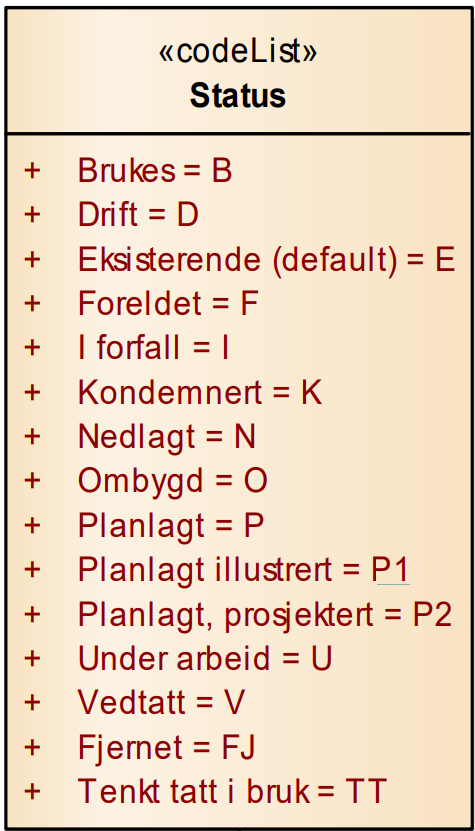

In [61]:
active_hydro_plants = hydro_plant_gdf[hydro_plant_gdf['status'].isin(['D', 'B'])]

Duplicates

In [62]:
active_hydro_plants[active_hydro_plants.duplicated('vannkraftverkNavn')][['vassdragsnummer', 'vannkraftverkNavn', 'maksYtelse_MW']]


,vassdragsnummer,vannkraftverkNavn,maksYtelse_MW
810,002.B7,Solbergfoss,201.00
892,021.A125,Hunsfoss,25.10
901,012.EA4,Askerudfoss,13.20
904,012.C1,Embretsfoss,71.00
905,002.H12,Braskereidfoss,35.95
...,...,...,...
3214,062.BAA,Bjørndalen,2.30
3230,087.A24,Eidsfossen,9.94
3236,144.4A1,Kvernhusfossen,2.10
3238,087.A24,Eidsfossen,9.94


In [65]:
active_hydro_plants = active_hydro_plants[active_hydro_plants['maksYtelse_MW']>0]

Aggeragating duplicates

In [66]:
# Aggeragating duplicated power plants, finding total capacity (max_power)
hydro_plant_total_max_power_gdf = active_hydro_plants.groupby('vannkraftverkNavn').agg(
    max_power_MW=('maksYtelse_MW', 'sum')
).reset_index()


# Finding the lake area and center of reservoirs
reservoir_gdf['lake_area'] = reservoir_gdf.area
reservoir_gdf['reservoar_center'] = reservoir_gdf['geometry'].centroid

# Aggeregating the reservoirs on lake areas, and selecting the center of the first reservoir for each power plant
reservoir_area_per_plant = reservoir_gdf.groupby('vannkraftverkNavn').agg(
    lake_area=('lake_area', 'sum'),
    location=('reservoar_center', 'first')
).reset_index()


Final dataset for assessment

In [67]:
# Merging power plant with reservoirs to get the respective capacity of each reservoir
hydro_df = hydro_plant_total_max_power_gdf.merge(reservoir_area_per_plant, on='vannkraftverkNavn', how='inner')
hydro_gdf = gpd.GeoDataFrame(hydro_df, geometry='location', crs='EPSG:25833')

# Extracting data needed for simulation
# -------------------------------------


hydro_gdf['latitude'] = hydro_gdf['location'].to_crs('EPSG:4326').y
hydro_gdf['longitude'] = hydro_gdf['location'].to_crs('EPSG:4326').x
hydro_gdf['lake_id'] = hydro_gdf['vannkraftverkNavn']

max_lake_coverage_hydro_power = 0.25 
hydro_gdf['selected_area'] = hydro_gdf['lake_area'] * max_lake_coverage_hydro_power


# Exporting dataset
hydro_gdf[['lake_id', 'lake_area', 'selected_area', 'latitude', 'longitude', 'max_power_MW']].to_csv('../data/new_data/hydro_power_systems.csv')

In [55]:
hydro_gdf['lake_area'].sum()

7140271618.489933